# Clustering Using K-Means:


---



---



## Introduction

In this exercise, you will implement the K-means clustering algorithm and apply it to Dataset with two features represents the length and width of the person to determine his size cluster. we strongly recommend Asking your colleagues and your Coach Using Questions And Discussions Channel on Microsoft Teams.

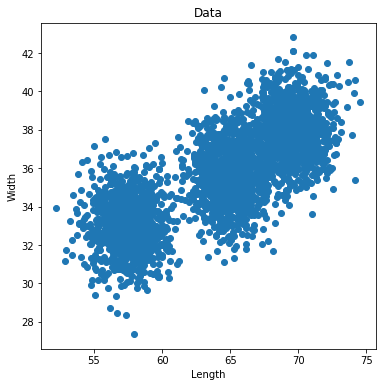

In [ ]:
import numpy as np                          # Dealing with Numpy Arrays
import matplotlib.pyplot as plt             # matplotlib is used for ploting graphs

# Lets the plots appears in the notebook
%matplotlib inline                          



X = np.genfromtxt(r'Tshirts Dataset.csv', delimiter=',')
K = 3
iterations = 100

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')
plt.grid(False)

## 1- Implementing K-means

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set  {𝑥(1),⋯,𝑥(𝑚)}

The K-means algorithm steps is as follows:

```python
Centroids = Init_Centroids(X, K)
for i in range(iterations):
    # Get the Closet Centroid list that corresponds to each training example
    ExamplesCentroids = GetExamplesCentroids(X, Centroids)
    
    # Change Centroid Position using Mean
    Centroids = computeCentroidsMeans(X, ExamplesCentroids, K):
```

Then you may use the last Centroids values to get a cluster for any other input 

### 1.1 - Initialize Centroids



In [ ]:
def Init_Centroids(X, K):
    m, n = X.shape
    Centroids = np.zeros((K, n))
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    Centroids = X[randidx[:K], :]
    
    return Centroids

In [ ]:
C = Init_Centroids(X,K)
print(C)

[[58.73379129 34.6937819 ]
 [68.07318279 40.27065302]
 [64.4415827  38.90588347]]


### 1.2 - Calculate Euclidean Distance
Euclidean Distance is a method to calculate distance between two points ( P and Q )using the Following equation 
$$ d\left( P,Q\right)   = \sqrt {\left( Q_{0}-P_{0}\right)^2 + \left  ( Q_{1}-P_{1}\right)^2} $$

In [ ]:
def Calculate_Distance(P,Q):
    '''
    Parameters:
                P and Q are two points each one of them contains 2 variables Ex. P[0] = Length, P[1] Width, of point P
    
    Return:
                Calculated Euclidean Distance using the illustrated formula 
    '''
    Distance = 0
    Distance=np.sqrt((P[0]-Q[0])**2 + (Q[1]-P[1])**2)
    return Distance

In [ ]:
Distance = Calculate_Distance([6.35,50.79],[2.13,70.64])
print(Distance)

20.293617223156645


### 1.3 - Get Examples Centroids
in this section we need to get the nearest centroid to each training example $x^{(i)}$ Given the list of centroids positions.




In [ ]:
def AssignItemCentroid(X, Centroids):
    '''
    Parameters :
                  X ->  Training Examples array of shape (m,n) = (3000,2)
                  Centroids -> Value of Each Centroid (K, n) = (3,2)
    Return : 
                  ExamplesCentroids -> List of the number of cluster that corresponds to the training example 
                                        (Ex.)  the Centroid which is closest to 5th point in the training data
                                        is the centroid number 3 (Cluster 3) then ExamplesCentroids[5] = 3
    --:
                  - Go over every example
                  - find its closest centroid, and store
                  the index inside `ExamplesCentroids` at the appropriate location.

                  ExamplesCentroids[i] should contain the index of the centroid
                  closest to example i. then, it should be a value in the 
                  range [0,K-1]
    '''

    ExamplesCentroids = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]) :
      least=999999
      for j in range(len(Centroids)) :
        distance=Calculate_Distance(X[i],Centroids[j])
        if distance < least :
          least=distance
          ExamplesCentroids[i]=j 
    return ExamplesCentroids

In [ ]:
Cen = np.array([[55.94703516,34.13791425],
                [69.39010661,38.41906049],
                [68.30947147,35.25632493]])
ExCen = AssignItemCentroid(X, Cen)
print(ExCen[:10])

[2 2 0 2 0 1 0 0 2 2]


### 1.4 - Computing centroid means

Given each example nearest centroid, next we should recalculatee each centroid according to the mean of the points that were assigned to it. for every centroid $k$ we set

$$ mean_k := \frac{1}{S_k} \sum_{i \in S_k} x^{(i)}$$

where $S_k$ is the number of examples assigned to the current centroid $k$, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

You should now complete the code in the function `computeCentroids`. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

In [ ]:
def computeCentroidsMeans(X, ExamplesCentroids, K):
    '''
    Parameters :
                  X ->  Training Examples array of shape (m,n) = (3000,2)
                  ExamplesCentroids -> List of the number of cluster that corresponds to the training example 
                                        (Ex.)  the Centroid which is closest to 5th point in the training data
                                        is the centroid number 3 (Cluster 3) then ExamplesCentroids[5] = 3
                  K -> Number of Clusters 
    Return : 
                  Centroids -> Array in shape (k,n) 
                  where each row is the mean of the data points assigned to it.
    --:
                  Go over every centroid and compute mean of all points that
                  belongs to it
    '''
    m, n = X.shape
    Centroids = np.zeros((K, n))

    for i in range(len(Centroids)) :
      sum=0
      count=0
      for j in range(X.shape[0]) :
        if ExamplesCentroids[j] == i :
          sum+=X[j]
          count+=1
      Centroids=sum/count
   
    return Centroids

In [ ]:
Cen = np.array([[55.94703516,34.13791425],
                [69.39010661,38.41906049],
                [68.30947147,35.25632493]])
ExCen = AssignItemCentroid(X, Cen)
Means = (X,  ExCen, K)
print(Means[0][:4])

[[68.97090377 35.89513132]
 [65.64814248 33.54754707]
 [56.52163204 30.92447103]
 [64.29842045 36.87739494]]


### 1.5 - Train K-Means




In [ ]:
def Run_KMeans():
    Centroids = Init_Centroids(X, K) 
    ExamplesCentroids = AssignItemCentroid(X, Centroids)
    computeCentroidsMeans(X, ExamplesCentroids, K)
    return Centroids,ExamplesCentroids

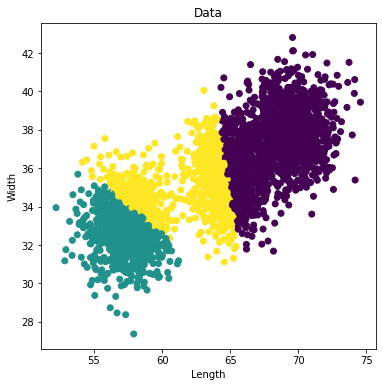

In [ ]:
_,ExamplesCentroids = Run_KMeans()

fig = plt.figure(figsize=(6, 6))
AllData = fig.add_subplot(111)
AllData.scatter(X[:, 0], X[:, 1],c=ExamplesCentroids)
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')
plt.grid(False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2 - Implemented Clustering Algorithms Examples

### 2.2 - K-Means on Face Data

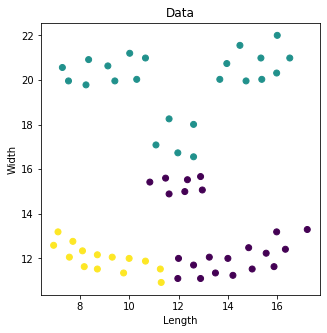

In [ ]:
from sklearn.cluster import KMeans

DataX = np.genfromtxt(r'K-Means Smily.csv', delimiter=',')
kmeans = KMeans(n_clusters=3, random_state=0).fit(DataX)
fig = plt.figure(figsize=(5, 5))
AllData = fig.add_subplot(111)
AllData.scatter(DataX[:, 0], DataX[:, 1],c=kmeans.labels_)
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')
plt.grid(False)

### 2.2 - Optics Algorithm on Face Data

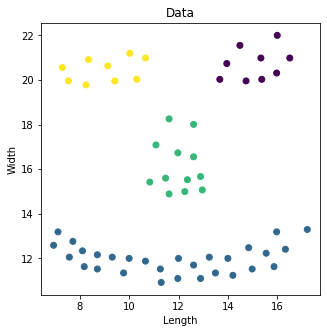

In [ ]:
from sklearn.cluster import OPTICS

clust = OPTICS(min_samples=5, xi=.25, min_cluster_size=.05)
clust.fit(DataX)

fig = plt.figure(figsize=(5, 5))
AllData = fig.add_subplot(111)
AllData.scatter(DataX[:, 0], DataX[:, 1],c = clust.labels_)
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')
plt.grid(False)

### Conclusion 
There are many diffrent algorithms can be used for clustering each one of them can be better in diffrent problems and datasets.
Also, the diffrent implementation and optimization may cause diffrent accuracies with the same Algorithm